In [52]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [2]:
path = r'Hotel Reservations Dataset/Hotel Reservations.csv'
data = pd.read_csv(path)

In [3]:
data

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


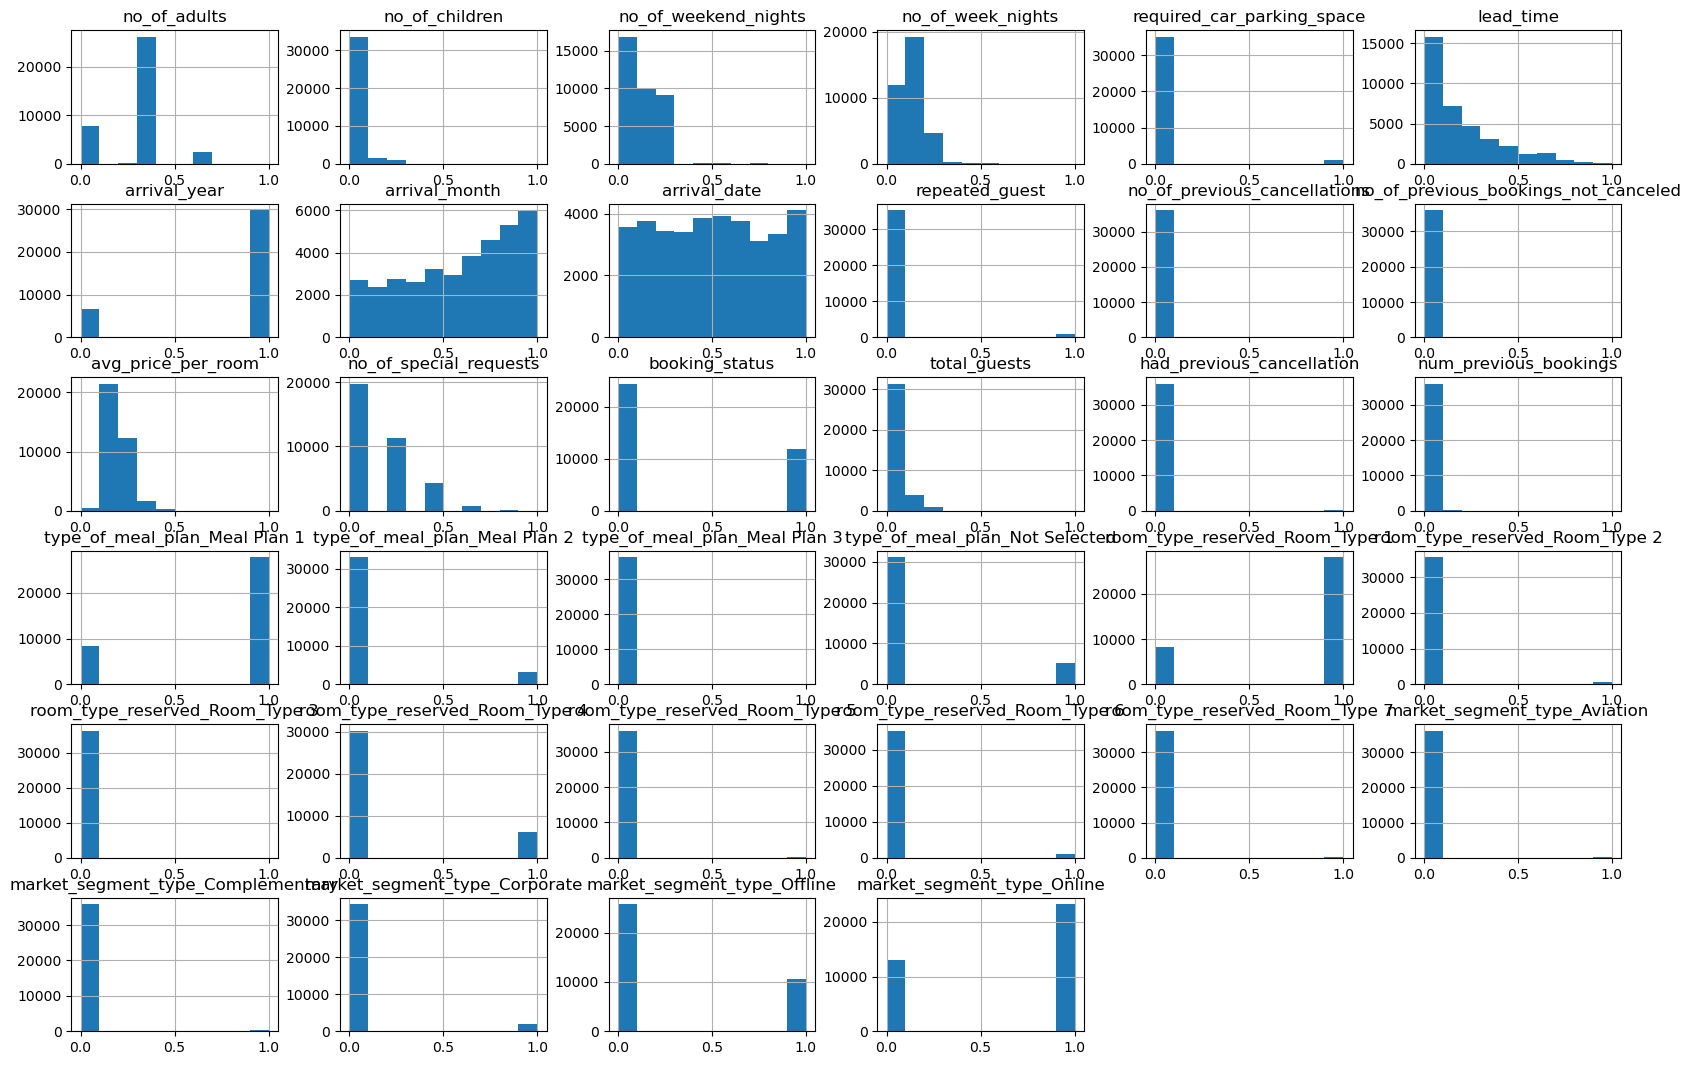

In [54]:
data.hist(figsize=(20, 13));

In [5]:
(data == 0).sum()

Booking_ID                                  0
no_of_adults                              139
no_of_children                          33577
no_of_weekend_nights                    16872
no_of_week_nights                        2387
type_of_meal_plan                           0
required_car_parking_space              35151
room_type_reserved                          0
lead_time                                1297
arrival_year                                0
arrival_month                               0
arrival_date                                0
market_segment_type                         0
repeated_guest                          35345
no_of_previous_cancellations            35937
no_of_previous_bookings_not_canceled    35463
avg_price_per_room                        545
no_of_special_requests                  19777
booking_status                              0
dtype: int64

In [6]:
data.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

<Axes: xlabel='booking_status'>

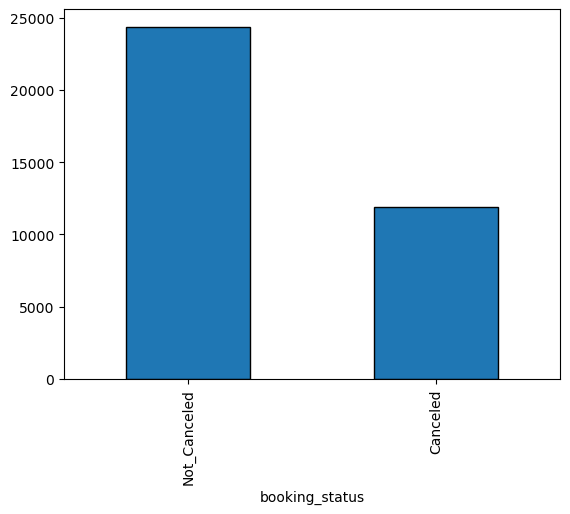

In [7]:
value_counts = data['booking_status'].value_counts()
value_counts.plot(kind='bar', edgecolor='black')

In [8]:
columns_to_nan = ['no_of_adults', 'avg_price_per_room']
data[columns_to_nan] = data[columns_to_nan].replace(0, np.nan)

In [9]:
(data == 0).sum()

Booking_ID                                  0
no_of_adults                                0
no_of_children                          33577
no_of_weekend_nights                    16872
no_of_week_nights                        2387
type_of_meal_plan                           0
required_car_parking_space              35151
room_type_reserved                          0
lead_time                                1297
arrival_year                                0
arrival_month                               0
arrival_date                                0
market_segment_type                         0
repeated_guest                          35345
no_of_previous_cancellations            35937
no_of_previous_bookings_not_canceled    35463
avg_price_per_room                          0
no_of_special_requests                  19777
booking_status                              0
dtype: int64

In [10]:
data.isnull().sum()

Booking_ID                                0
no_of_adults                            139
no_of_children                            0
no_of_weekend_nights                      0
no_of_week_nights                         0
type_of_meal_plan                         0
required_car_parking_space                0
room_type_reserved                        0
lead_time                                 0
arrival_year                              0
arrival_month                             0
arrival_date                              0
market_segment_type                       0
repeated_guest                            0
no_of_previous_cancellations              0
no_of_previous_bookings_not_canceled      0
avg_price_per_room                      545
no_of_special_requests                    0
booking_status                            0
dtype: int64

In [11]:
to_KNN = KNNImputer(n_neighbors=10)
data[columns_to_nan] = to_KNN.fit_transform(data[columns_to_nan])

In [12]:
data

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2.0,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2.0,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1.0,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2.0,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2.0,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3.0,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2.0,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2.0,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2.0,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


In [13]:
data.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [14]:
data

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2.0,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2.0,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1.0,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2.0,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2.0,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3.0,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2.0,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2.0,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2.0,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


In [15]:
data.drop('Booking_ID', axis=1, inplace=True)

In [16]:
data

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2.0,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2.0,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1.0,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,2.0,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,2.0,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3.0,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,2.0,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,2.0,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,2.0,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


In [17]:
data['total_guests'] = data['no_of_adults'] + data['no_of_children']

In [18]:
data

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,total_guests
0,2.0,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled,2.0
1,2.0,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled,2.0
2,1.0,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled,1.0
3,2.0,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled,2.0
4,2.0,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3.0,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled,3.0
36271,2.0,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled,2.0
36272,2.0,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled,2.0
36273,2.0,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled,2.0


In [19]:
data['had_previous_cancellation'] = (data['no_of_previous_cancellations'] != 0).astype(int)

In [20]:
data

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,total_guests,had_previous_cancellation
0,2.0,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled,2.0,0
1,2.0,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled,2.0,0
2,1.0,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled,1.0,0
3,2.0,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled,2.0,0
4,2.0,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3.0,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled,3.0,0
36271,2.0,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled,2.0,0
36272,2.0,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled,2.0,0
36273,2.0,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled,2.0,0


In [21]:
data['num_previous_bookings'] = data['no_of_previous_cancellations'] + data['no_of_previous_bookings_not_canceled']

In [22]:
data

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,...,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,total_guests,had_previous_cancellation,num_previous_bookings
0,2.0,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,...,Offline,0,0,0,65.00,0,Not_Canceled,2.0,0,0
1,2.0,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,...,Online,0,0,0,106.68,1,Not_Canceled,2.0,0,0
2,1.0,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,...,Online,0,0,0,60.00,0,Canceled,1.0,0,0
3,2.0,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,...,Online,0,0,0,100.00,0,Canceled,2.0,0,0
4,2.0,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,...,Online,0,0,0,94.50,0,Canceled,2.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3.0,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,...,Online,0,0,0,167.80,1,Not_Canceled,3.0,0,0
36271,2.0,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,...,Online,0,0,0,90.95,2,Canceled,2.0,0,0
36272,2.0,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,...,Online,0,0,0,98.39,2,Not_Canceled,2.0,0,0
36273,2.0,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,...,Online,0,0,0,94.50,0,Canceled,2.0,0,0


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 21 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  float64
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   type_of_meal_plan                     36275 non-null  object 
 5   required_car_parking_space            36275 non-null  int64  
 6   room_type_reserved                    36275 non-null  object 
 7   lead_time                             36275 non-null  int64  
 8   arrival_year                          36275 non-null  int64  
 9   arrival_month                         36275 non-null  int64  
 10  arrival_date                          36275 non-null  int64  
 11  market_segment_

In [24]:
print('type_of_meal_plan:', data['type_of_meal_plan'].unique())
print('room_type_reserved:', data['type_of_meal_plan'].nunique())
print('market_segment_type:', data['type_of_meal_plan'].nunique())

type_of_meal_plan: ['Meal Plan 1' 'Not Selected' 'Meal Plan 2' 'Meal Plan 3']
room_type_reserved: 4
market_segment_type: 4


In [25]:
cilumns_to_OHE = ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type']
data = pd.get_dummies(data, columns=cilumns_to_OHE)

In [26]:
data

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,...,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,2.0,0,1,2,0,224,2017,10,2,0,...,False,False,False,False,False,False,False,False,True,False
1,2.0,0,2,3,0,5,2018,11,6,0,...,False,False,False,False,False,False,False,False,False,True
2,1.0,0,2,1,0,1,2018,2,28,0,...,False,False,False,False,False,False,False,False,False,True
3,2.0,0,0,2,0,211,2018,5,20,0,...,False,False,False,False,False,False,False,False,False,True
4,2.0,0,1,1,0,48,2018,4,11,0,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3.0,0,2,6,0,85,2018,8,3,0,...,False,True,False,False,False,False,False,False,False,True
36271,2.0,0,1,3,0,228,2018,10,17,0,...,False,False,False,False,False,False,False,False,False,True
36272,2.0,0,2,6,0,148,2018,7,1,0,...,False,False,False,False,False,False,False,False,False,True
36273,2.0,0,0,3,0,63,2018,4,21,0,...,False,False,False,False,False,False,False,False,False,True


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 34 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  float64
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   required_car_parking_space            36275 non-null  int64  
 5   lead_time                             36275 non-null  int64  
 6   arrival_year                          36275 non-null  int64  
 7   arrival_month                         36275 non-null  int64  
 8   arrival_date                          36275 non-null  int64  
 9   repeated_guest                        36275 non-null  int64  
 10  no_of_previous_cancellations          36275 non-null  int64  
 11  no_of_previous_

In [28]:
data['booking_status'] = data['booking_status'].replace({'Not_Canceled': 0, 'Canceled': 1})

In [29]:
data

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,...,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,2.0,0,1,2,0,224,2017,10,2,0,...,False,False,False,False,False,False,False,False,True,False
1,2.0,0,2,3,0,5,2018,11,6,0,...,False,False,False,False,False,False,False,False,False,True
2,1.0,0,2,1,0,1,2018,2,28,0,...,False,False,False,False,False,False,False,False,False,True
3,2.0,0,0,2,0,211,2018,5,20,0,...,False,False,False,False,False,False,False,False,False,True
4,2.0,0,1,1,0,48,2018,4,11,0,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3.0,0,2,6,0,85,2018,8,3,0,...,False,True,False,False,False,False,False,False,False,True
36271,2.0,0,1,3,0,228,2018,10,17,0,...,False,False,False,False,False,False,False,False,False,True
36272,2.0,0,2,6,0,148,2018,7,1,0,...,False,False,False,False,False,False,False,False,False,True
36273,2.0,0,0,3,0,63,2018,4,21,0,...,False,False,False,False,False,False,False,False,False,True


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 34 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  float64
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   required_car_parking_space            36275 non-null  int64  
 5   lead_time                             36275 non-null  int64  
 6   arrival_year                          36275 non-null  int64  
 7   arrival_month                         36275 non-null  int64  
 8   arrival_date                          36275 non-null  int64  
 9   repeated_guest                        36275 non-null  int64  
 10  no_of_previous_cancellations          36275 non-null  int64  
 11  no_of_previous_

In [31]:
data_columns_name = data.columns.tolist()
data_columns_name = [col for col in data_columns_name if col != 'booking_status']
print(data_columns_name)

['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests', 'total_guests', 'had_previous_cancellation', 'num_previous_bookings', 'type_of_meal_plan_Meal Plan 1', 'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Meal Plan 3', 'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 1', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 3', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'market_segment_type_Aviation', 'market_segment_type_Complementary', 'market_segment_type_Corporate', 'market_segment_type_Offline', 'market_segment_type_Online']


In [32]:
to_MMS = MinMaxScaler()
data[data_columns_name] = to_MMS.fit_transform(data[data_columns_name])

In [33]:
data

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,...,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,0.333333,0.0,0.142857,0.117647,0.0,0.505643,0.0,0.818182,0.033333,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.333333,0.0,0.285714,0.176471,0.0,0.011287,1.0,0.909091,0.166667,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.000000,0.0,0.285714,0.058824,0.0,0.002257,1.0,0.090909,0.900000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.333333,0.0,0.000000,0.117647,0.0,0.476298,1.0,0.363636,0.633333,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.333333,0.0,0.142857,0.058824,0.0,0.108352,1.0,0.272727,0.333333,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,0.666667,0.0,0.285714,0.352941,0.0,0.191874,1.0,0.636364,0.066667,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
36271,0.333333,0.0,0.142857,0.176471,0.0,0.514673,1.0,0.818182,0.533333,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
36272,0.333333,0.0,0.285714,0.352941,0.0,0.334086,1.0,0.545455,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
36273,0.333333,0.0,0.000000,0.176471,0.0,0.142212,1.0,0.272727,0.666667,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 34 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  float64
 1   no_of_children                        36275 non-null  float64
 2   no_of_weekend_nights                  36275 non-null  float64
 3   no_of_week_nights                     36275 non-null  float64
 4   required_car_parking_space            36275 non-null  float64
 5   lead_time                             36275 non-null  float64
 6   arrival_year                          36275 non-null  float64
 7   arrival_month                         36275 non-null  float64
 8   arrival_date                          36275 non-null  float64
 9   repeated_guest                        36275 non-null  float64
 10  no_of_previous_cancellations          36275 non-null  float64
 11  no_of_previous_

In [35]:
X = data.drop('booking_status', axis=1)
y = data['booking_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

In [36]:
y

0        0
1        0
2        1
3        1
4        1
        ..
36270    0
36271    1
36272    0
36273    1
36274    0
Name: booking_status, Length: 36275, dtype: int64

In [37]:
X

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,...,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,0.333333,0.0,0.142857,0.117647,0.0,0.505643,0.0,0.818182,0.033333,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.333333,0.0,0.285714,0.176471,0.0,0.011287,1.0,0.909091,0.166667,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.000000,0.0,0.285714,0.058824,0.0,0.002257,1.0,0.090909,0.900000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.333333,0.0,0.000000,0.117647,0.0,0.476298,1.0,0.363636,0.633333,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.333333,0.0,0.142857,0.058824,0.0,0.108352,1.0,0.272727,0.333333,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,0.666667,0.0,0.285714,0.352941,0.0,0.191874,1.0,0.636364,0.066667,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
36271,0.333333,0.0,0.142857,0.176471,0.0,0.514673,1.0,0.818182,0.533333,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
36272,0.333333,0.0,0.285714,0.352941,0.0,0.334086,1.0,0.545455,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
36273,0.333333,0.0,0.000000,0.176471,0.0,0.142212,1.0,0.272727,0.666667,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [38]:
Model_1 = RandomForestClassifier(n_estimators=10000, random_state=50, n_jobs=-1)
Model_1.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10000, n_jobs=-1, random_state=50)

In [39]:
y_perd = Model_1.predict(X_test)
print(classification_report(y_test, y_perd))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93      4837
           1       0.89      0.80      0.85      2418

    accuracy                           0.90      7255
   macro avg       0.90      0.88      0.89      7255
weighted avg       0.90      0.90      0.90      7255



In [40]:
Model_1_GS = RandomForestClassifier()
param_grid = {
    'n_estimators': [50, 100, 200, 500, 1000, 1200, 1500, 2000, 5000],
    'max_depth': [None, 10, 20, 50, 100],
}

grid_search = GridSearchCV(estimator=Model_1_GS, param_grid=param_grid, cv=8, scoring='f1_macro', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

/home/amirhosein/anaconda3/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best parameters: {'max_depth': 100, 'n_estimators': 500}
Best cross-validation score: 0.8841890469049751


In [46]:
Model_1 = RandomForestClassifier(n_estimators=1000, random_state=50, max_depth=100, n_jobs=-1)
Model_1.fit(X_train, y_train)
y_perd = Model_1.predict(X_test)
print(classification_report(y_test, y_perd))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93      4837
           1       0.90      0.80      0.85      2418

    accuracy                           0.90      7255
   macro avg       0.90      0.88      0.89      7255
weighted avg       0.90      0.90      0.90      7255



In [51]:
model_2 = GradientBoostingClassifier(learning_rate=0.1, n_estimators=1000, random_state=50, max_depth=10)
model_2.fit(X_train, y_train)
y_perd = model_2.predict(X_test)
print(classification_report(y_test, y_perd))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93      4837
           1       0.89      0.81      0.85      2418

    accuracy                           0.90      7255
   macro avg       0.90      0.88      0.89      7255
weighted avg       0.90      0.90      0.90      7255



In [53]:
Model_3 = SVC()
Model_3.fit(X_train, y_train)
y_perd = Model_3.predict(X_test)
print(classification_report(y_test, y_perd))

              precision    recall  f1-score   support

           0       0.84      0.92      0.87      4837
           1       0.79      0.64      0.71      2418

    accuracy                           0.82      7255
   macro avg       0.81      0.78      0.79      7255
weighted avg       0.82      0.82      0.82      7255

